In [1]:
import os
import pandas as pd

In [2]:
data_dir = r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\Ensemble Models\Data-1\Data'

In [32]:
os.chdir(data_dir)

In [33]:
df = pd.read_csv("HR_comma_sep.csv")

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [36]:
df.rename(columns={'sales':'department'},inplace=True)

In [37]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [38]:
X = df.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [39]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [40]:
Y = df['left']

In [41]:
X = pd.get_dummies(X)

In [42]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=200)

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [51]:
clf.fit(X_train,Y_train)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [52]:
clf.oob_score_

0.986165513792816

In [54]:
clf.score(X_test,Y_test)

0.992

In [55]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,Y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9807483956996417
************************
For n_estimators = 30
OOB score is 0.9868322360196683
************************
For n_estimators = 50
OOB score is 0.9879156596383032
************************
For n_estimators = 70
OOB score is 0.9884990415867989
************************
For n_estimators = 90
OOB score is 0.9884990415867989
************************
For n_estimators = 110
OOB score is 0.9889157429785815
************************
For n_estimators = 130
OOB score is 0.9889990832569381
************************
For n_estimators = 150
OOB score is 0.9889990832569381
************************
For n_estimators = 170
OOB score is 0.9889157429785815
************************
For n_estimators = 190
OOB score is 0.988832402700225
************************
For n_estimators = 210
OOB score is 0.9889157429785815
************************
For n_estimators = 230
OOB score is 0.9891657638136512
************************
For n_estimators = 250
OOB score is 0.98866572

In [57]:
#Finalizing on a tree model with 20 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,Y_train)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [58]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                       

In [59]:
print(clf.estimators_[0]) #first tree model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1859118377, splitter='best')


In [60]:
print(clf.estimators_[0].feature_importances_)

[5.11467958e-01 1.04677095e-01 1.01764679e-01 1.17415840e-01
 1.37877890e-01 2.52823175e-04 2.06877978e-04 2.53138664e-03
 5.61949127e-04 0.00000000e+00 6.47425073e-04 8.53967714e-04
 3.15415905e-05 1.00748835e-03 3.71162040e-03 3.13424992e-03
 7.18362071e-03 3.85903988e-05 5.31773087e-03 1.31726579e-03]


In [65]:
# We can extract feature importance from each tree then take a mean for all trees
import numpy as np
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)
imp

array([4.91226133e-01, 1.38416254e-01, 1.09773611e-01, 1.00772585e-01,
       1.36392621e-01, 1.04460525e-03, 1.27121768e-04, 1.39695452e-03,
       7.07673084e-04, 7.85428576e-04, 7.20194241e-04, 8.83093536e-04,
       6.53026487e-04, 3.23118569e-04, 2.79016469e-03, 2.65227896e-03,
       3.56464360e-03, 1.49523766e-03, 3.54896449e-03, 2.72629122e-03])

In [63]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [64]:
feature_importance.sort_values(ascending=False)

satisfaction_level        0.491226
last_evaluation           0.138416
time_spend_company        0.136393
number_project            0.109774
average_montly_hours      0.100773
department_technical      0.003565
salary_low                0.003549
department_sales          0.002790
salary_medium             0.002726
department_support        0.002652
salary_high               0.001495
department_IT             0.001397
Work_accident             0.001045
department_management     0.000883
department_accounting     0.000785
department_hr             0.000720
department_RandD          0.000708
department_marketing      0.000653
department_product_mng    0.000323
promotion_last_5years     0.000127
dtype: float64

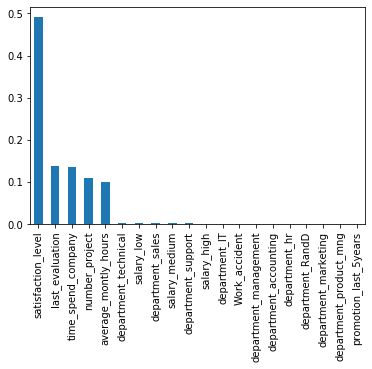

In [67]:
%matplotlib inline
feature_importance.sort_values(ascending=False).plot(kind='bar')

### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf = RandomForestClassifier(n_estimators=80, oob_score=True, n_jobs=-1,random_state=400)

In [73]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [74]:
clf.oob_score_

0.9896658054837904

In [76]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,Y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')   

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9813317776481374
************************
For n_estimators = 30
OOB score is 0.9884157013084424
************************
For n_estimators = 50
OOB score is 0.9892491040920076
************************
For n_estimators = 70
OOB score is 0.9898324860405033
************************
For n_estimators = 90
OOB score is 0.9899158263188599
************************
For n_estimators = 110
OOB score is 0.990082506875573
************************
For n_estimators = 130
OOB score is 0.9903325277106425
************************
For n_estimators = 150
OOB score is 0.9903325277106425
************************
For n_estimators = 170
OOB score is 0.9903325277106425
************************
For n_estimators = 190
OOB score is 0.9903325277106425
************************
For n_estimators = 210
OOB score is 0.990415867988999
************************
For n_estimators = 230
OOB score is 0.9903325277106425
************************
For n_estimators = 250
OOB score is 0.990332527

In [77]:
#Finalize 290 trees
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [78]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [79]:
clf.oob_score_

0.9903325277106425

In [80]:
clf.feature_importances_

array([0.31092898, 0.12410865, 0.17874487, 0.1485477 , 0.18706118,
       0.01100806, 0.00181675, 0.0017014 , 0.00172865, 0.00143548,
       0.00156753, 0.00136866, 0.00138704, 0.00116778, 0.00365226,
       0.00289058, 0.00381202, 0.00565397, 0.00774688, 0.00367156])

In [81]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [82]:
imp_feat.sort_values(ascending=False)

satisfaction_level        0.310929
time_spend_company        0.187061
number_project            0.178745
average_montly_hours      0.148548
last_evaluation           0.124109
Work_accident             0.011008
salary_low                0.007747
salary_high               0.005654
department_technical      0.003812
salary_medium             0.003672
department_sales          0.003652
department_support        0.002891
promotion_last_5years     0.001817
department_RandD          0.001729
department_IT             0.001701
department_hr             0.001568
department_accounting     0.001435
department_marketing      0.001387
department_management     0.001369
department_product_mng    0.001168
dtype: float64

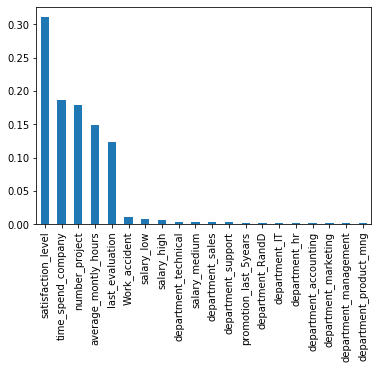

In [83]:
imp_feat.sort_values(ascending=False).plot(kind='bar')